In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def plot_results(df):
  unique_values = df['model'].unique()

  resnet_results = df[df['model'] == unique_values[0]]
  xception_results = df[df['model'] == unique_values[1]]

  fig, axes = plt.subplots(1, 2, figsize=(22, 10))

  x_min = min(resnet_results['f1-score(weighted avg)'].min(), xception_results['f1-score(weighted avg)'].min())
  x_max = max(resnet_results['f1-score(weighted avg)'].max(), xception_results['f1-score(weighted avg)'].max())


  for i, plot in enumerate([
      {"df": resnet_results, "model": "ResNet50"},
      {"df": xception_results, "model": "Xception"}
  ]):
      sns.set_style("whitegrid")
      sns.set(font='serif')
      sns.set_style("white", {
          "font.family": "serif",
          "font.serif": ["Times", "Palatino", "serif"],
      })

      params = {
          'axes.labelsize': 12,  # Font size of x and y labels
          'xtick.labelsize': 12,  # Font size of x-axis ticks
          'ytick.labelsize': 12,  # Font size of y-axis ticks
          'legend.title_fontsize': 18,  # Font size of legend
          'legend.markerscale': 3,  # Font size of legend
          'legend.fontsize': 12,  # Font size of legend
      }
      plt.rcParams.update(params)

      ax = sns.pointplot(
          data=plot['df'],
          x='f1-score(weighted avg)',
          y='evaluation_set',
          hue='approach',
          linestyles='none',
          errorbar="ci",
          dodge=.7,
          err_kws={'linewidth': 3},
          ax=axes[i]  # Specify which subplot to use
      )

      ax.set_xlabel("f1-score(weighted avg)", fontsize=24)

      ax.set_xlim(x_min, x_max)

        # Set y-label for the first plot only
      if i == 0:
          ax.set_ylabel("Evaluation Set", fontsize=24)
      else:
          ax.set_yticklabels([])
          ax.set_ylabel("")  # Empty string for the y-label

      ax.tick_params(labelsize=24)
      ax.set_title(plot['model'], fontsize=24)


  axes[0].legend_.remove()
  axes[1].legend_.remove()

  handles, labels = ax.get_legend_handles_labels()
  fig.legend(handles, labels, title="Approach", loc='lower center', bbox_to_anchor=(0.5, -0.175), fontsize=24, title_fontsize=24, ncol=3)


  plt.tight_layout()
  plt.savefig('../output/stratified_ood_plot.png')
  plt.show()

In [10]:
results = pd.read_csv(f'../results/official_output_29.4_15folds.csv')
results['evaluation_set'] = results['evaluation_set'].str.replace(' 3', '')

results_ood = results[results['evaluation_set'] != 'In-Distribution']

# Out of Distribution Stratified by Corruption Type


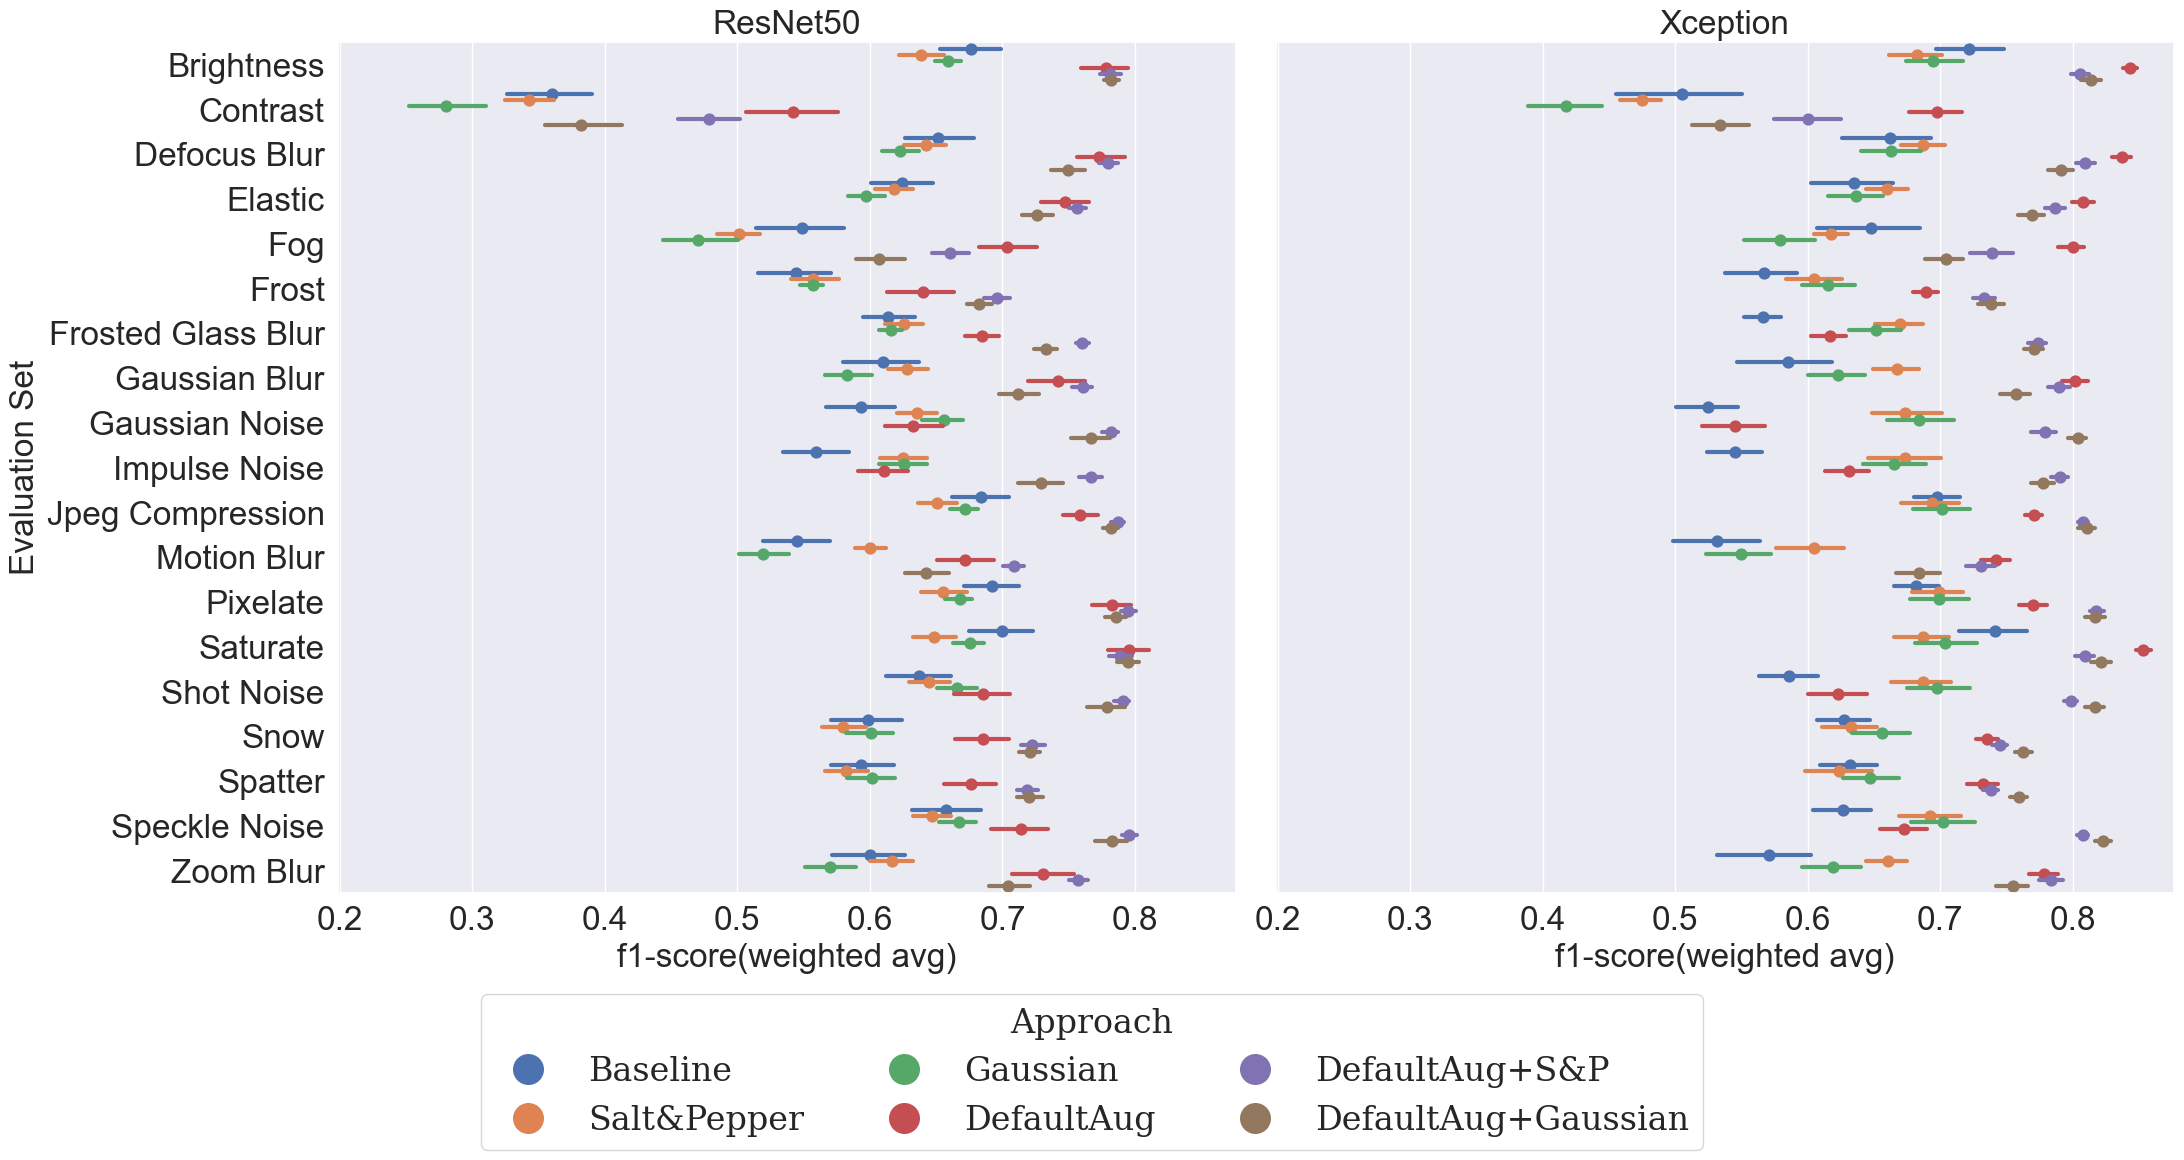

In [11]:
plot_results(results_ood)